In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb


In [3]:

# Function to calculate the normalization factor C
def calculate_C(n, p):
    floor_half_n = n // 2
    C = 0
    for k in range(floor_half_n + 1, n + 1):
        C += comb(n, k) * ((1 - p) ** k) * (p ** (n - k))
    return C

# Function to calculate the given function
def calculate_function(n, p, qT, qF):
    floor_half_n = n // 2
    C = calculate_C(n, p)
    total_sum = 0

    for k in range(floor_half_n + 1, n):
        for i in range(n - k):
            for j in range(2 * k - n + i, k + 1):
                term = (
                    comb(n, k)
                    * ((1 - p) ** k)
                    * (p ** (n - k))
                    * comb(n - k, i)
                    * (qT ** i)
                    * ((1 - qT) ** (n - k - i))
                    * comb(k, j)
                    * (qF ** j)
                    * ((1 - qF) ** (k - j))
                )
                total_sum += term

    return 1 - (total_sum / C)


/var/folders/g1/hfp6_lfs1yq7n1_87zm4vvf00000gn/T/ipykernel_9778/4189954169.py:31: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - (total_sum / C)


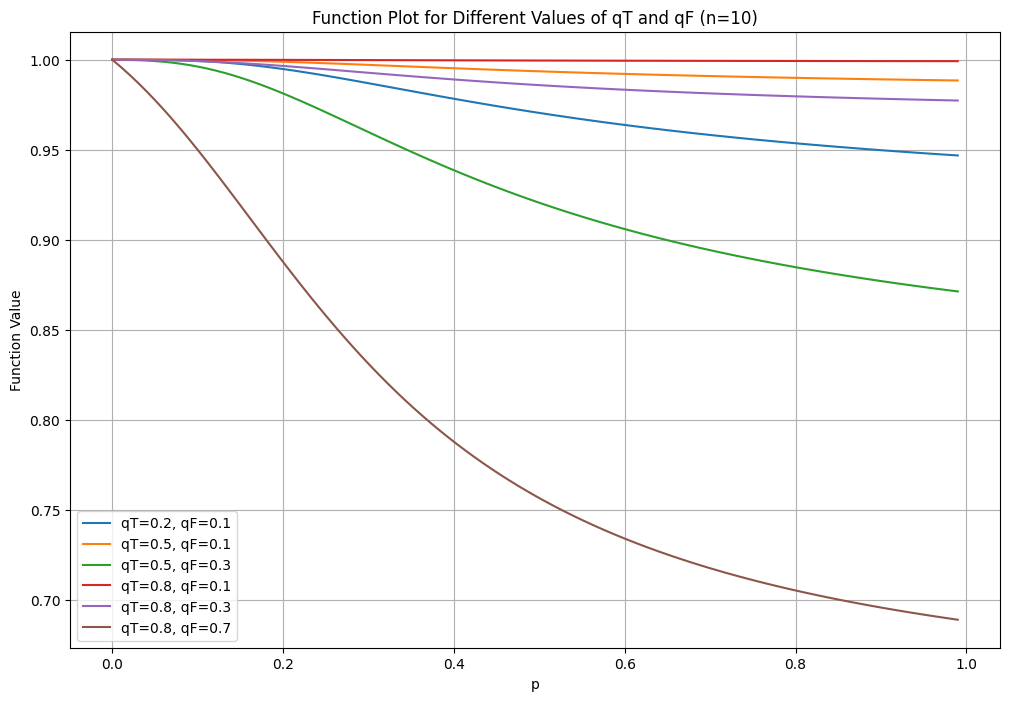

In [4]:

# Plotting function
def plot_function(n, qT_values, qF_values, p_values):
    plt.figure(figsize=(12, 8))

    for qT in qT_values:
        for qF in qF_values:
            if qT >= qF:
                y_values = [calculate_function(n, p, qT, qF) for p in p_values]
                label = f"qT={qT}, qF={qF}"
                plt.plot(p_values, y_values, label=label)

    plt.title(f"Function Plot for Different Values of qT and qF (n={n})")
    plt.xlabel("p")
    plt.ylabel("Function Value")
    plt.legend()
    plt.grid(True)
    plt.show()

# Parameters
n = 10
qT_values = [0.2, 0.5, 0.8]
qF_values = [0.1, 0.3, 0.7]
p_values = np.linspace(0, 1, 100)

# Plot the function
plot_function(n, qT_values, qF_values, p_values)

/var/folders/g1/hfp6_lfs1yq7n1_87zm4vvf00000gn/T/ipykernel_9778/4189954169.py:31: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - (total_sum / C)


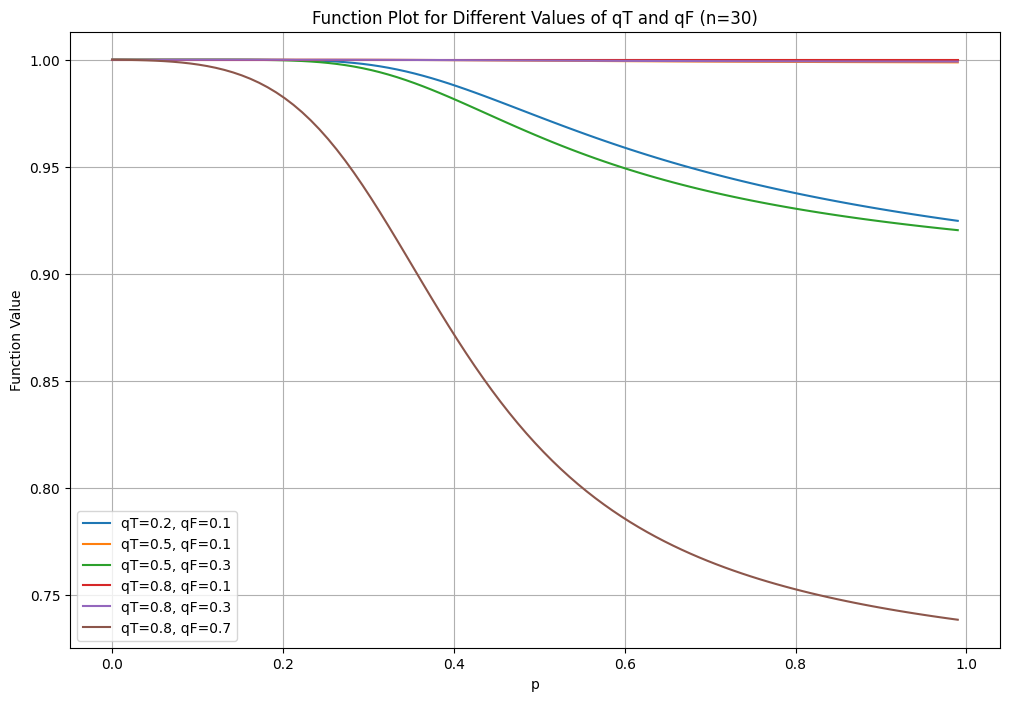

In [9]:
n = 30
qT_values = [0.2, 0.5, 0.8]
qF_values = [0.1, 0.3, 0.7]
p_values = np.linspace(0, 1, 100)

# Plot the function
plot_function(n, qT_values, qF_values, p_values)

/var/folders/g1/hfp6_lfs1yq7n1_87zm4vvf00000gn/T/ipykernel_6628/4189954169.py:31: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - (total_sum / C)


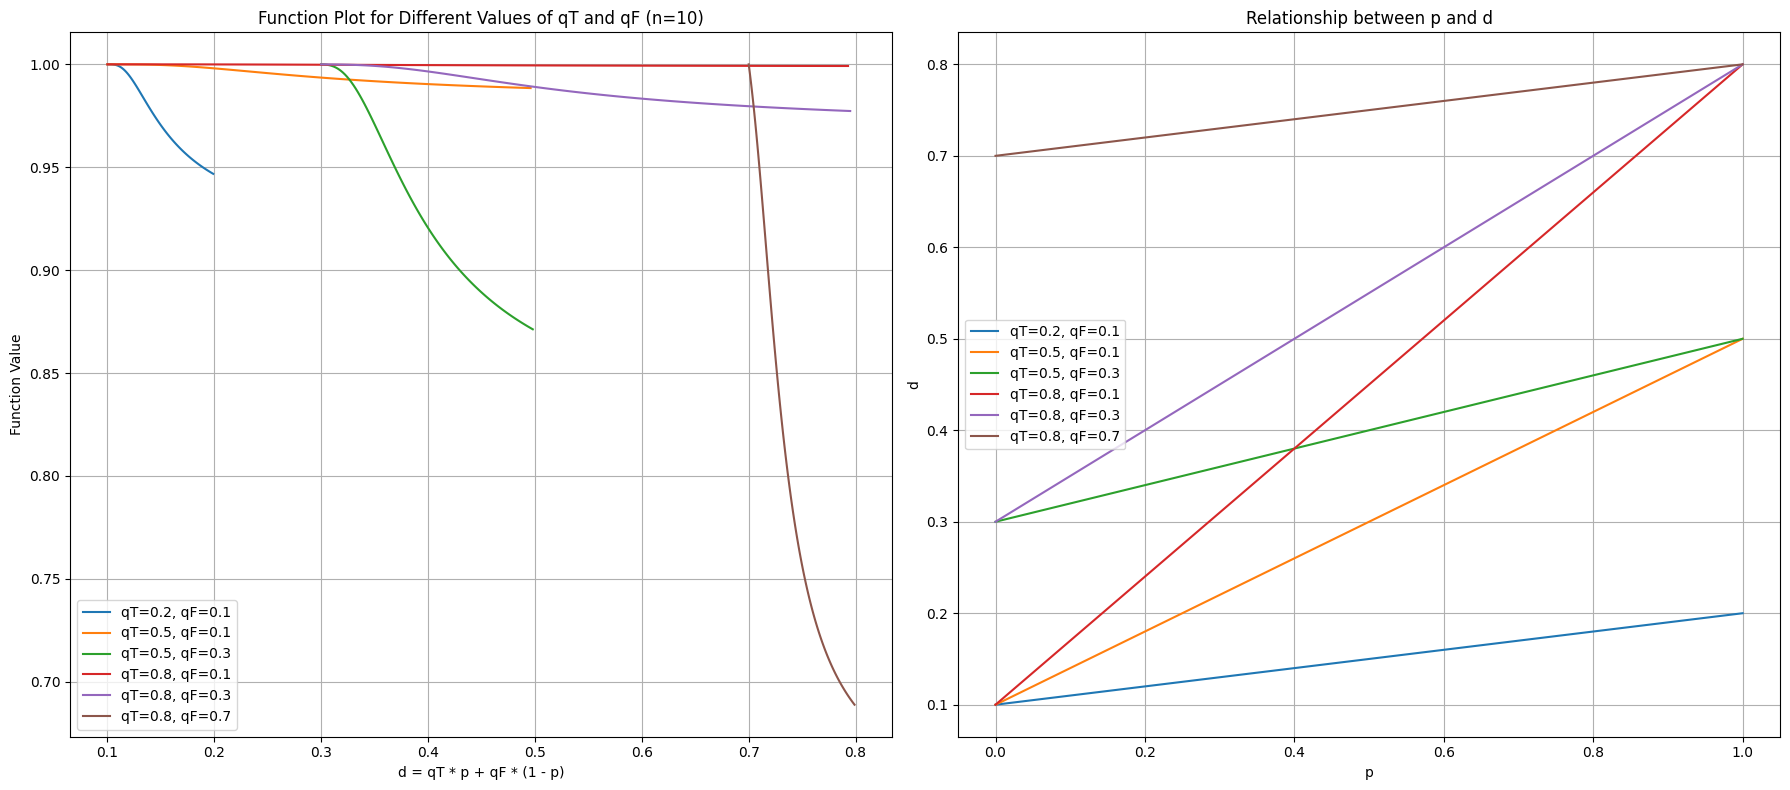

In [19]:
# Updated plotting function with two subplots
def plot_function_with_d_and_p(n, qT_values, qF_values, p_values):
    fig, axs = plt.subplots(1, 2, figsize=(18, 8))  # Create a figure with 2 subplots

    for qT in qT_values:
        for qF in qF_values:
            if qT >= qF:
                # Calculate d for each p
                d_values = [qT * p + qF * (1 - p) for p in p_values]
                # Calculate function values for each p
                y_values = [calculate_function(n, p, qT, qF) for p in p_values]
                label = f"qT={qT}, qF={qF}"
                
                # Plot the function values against d
                axs[0].plot(d_values, y_values, label=label)

                # Plot the relationship between p and d
                axs[1].plot(p_values, d_values, label=label)

    # First subplot: Function values
    axs[0].set_title(f"Function Plot for Different Values of qT and qF (n={n})")
    axs[0].set_xlabel("d = qT * p + qF * (1 - p)")
    axs[0].set_ylabel("Function Value")
    axs[0].legend()
    axs[0].grid(True)

    # Second subplot: Relationship between p and d
    axs[1].set_title("Relationship between p and d")
    axs[1].set_xlabel("p")
    axs[1].set_ylabel("d")
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Parameters
n = 10
qT_values = [0.2, 0.5, 0.8]
qF_values = [0.1, 0.3, 0.7]
p_values = np.linspace(0, 1, 100)

# Plot the function with d on the x-axis and the relationship between p and d
plot_function_with_d_and_p(n, qT_values, qF_values, p_values)

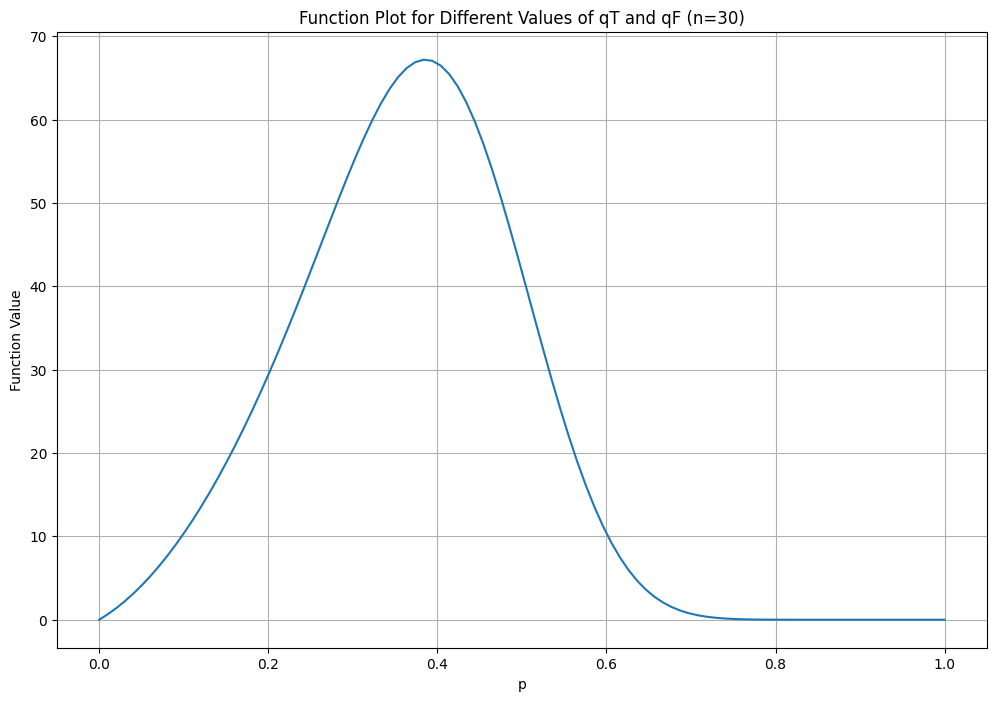

In [11]:
def dummy_function(n, p):
    floor_half_n = n // 2
    C = calculate_C(n, p)
    total_sum = 0

    for k in range(floor_half_n + 1, n):
        for i in range(n - k):
            for j in range(2 * k - n + i, k + 1):
                term = (
                    comb(n, k)
                    * ((1 - p) ** k)
                    * (p ** (n - k))
                )
                total_sum += term
    return total_sum

plt.figure(figsize=(12, 8))

y_values = [dummy_function(n, p) for p in p_values]
plt.plot(p_values, y_values)

plt.title(f"Function Plot for Different Values of qT and qF (n={n})")
plt.xlabel("p")
plt.ylabel("Function Value")
plt.grid(True)
plt.show()